In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Law of Large Numbers

We can simulate a large number of values for X.

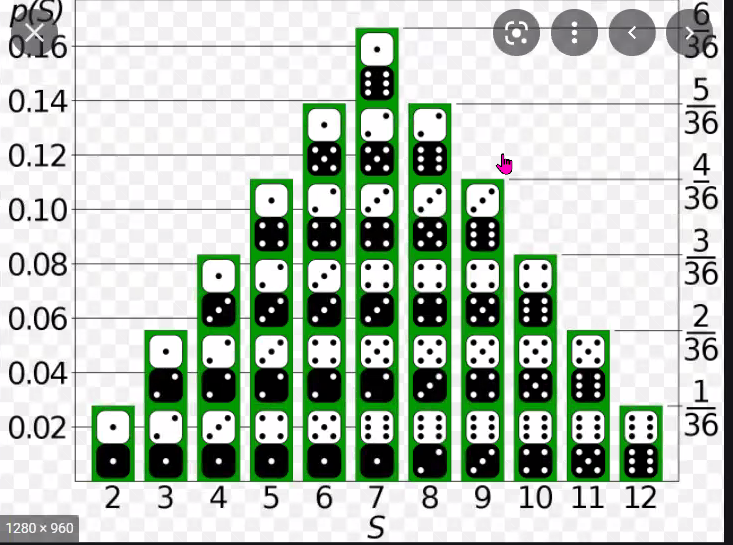

In [16]:
n = 10000  # zar atış sayısı

In [17]:
# birinci zar atış simülasyonu

np.random.seed(51)
die_1 = np.random.randint(1,7,size=n)

In [18]:
# ikinci zar atış simülasyonu

np.random.seed(81)
die_2 = np.random.randint(1,7,size=n)

In [19]:
# iki zar sonucunu toplayarak yeni bir array oluşturduk.

X = die_1 + die_2

In [20]:
X

array([6, 8, 2, ..., 4, 7, 9])

In [21]:
# bu array den bir frame oluşturduk.

df = pd.DataFrame({"die_1":die_1, "die_2":die_2, "X": X })

In [22]:
df.head(10)

,die_1,die_2,X
0,2,4,6
1,6,2,8
2,1,1,2
3,2,4,6
4,6,4,10
5,1,4,5
6,6,2,8
7,5,2,7
8,2,6,8
9,6,3,9


In [23]:
# 4 kere olanların satır sayısını bulduk.

total_four = df[df.X==4]
len(total_four)

874

In [24]:
# 4 gelenlerin sayısını toplam sayıya böldük. n=1000 iken bu 0.0104 tü. n sayısı arttıkça göreceli frekans teorik frekans o kadar yaklaşır. 
# Buna THE LAW OF LARGE NUMBER denir.
# 4 olanların göreceli frekansını bulduk.

p = len(total_four)/len(df)
p

0.0874

In [26]:
# Bu teorik frekanstır.

freq_teo = 1/12
freq_teo

0.08333333333333333

In [27]:
# gelen zar toplamlarından kaç tane olduğunu bulduk

freq = df.X.value_counts()
freq

7     1688
8     1394
6     1392
5     1147
9     1095
4      874
10     827
3      536
11     527
12     261
2      259
Name: X, dtype: int64

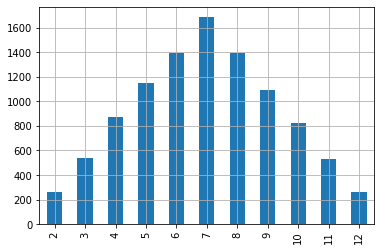

In [31]:
freq.sort_index().plot(kind='bar', grid=True);

In [29]:
# göreceli frekansa göre gelen zar sonuçlarından kaçar tane olduğunu gördük.

prob = df.X.value_counts()/n
prob

7     0.1688
8     0.1394
6     0.1392
5     0.1147
9     0.1095
4     0.0874
10    0.0827
3     0.0536
11    0.0527
12    0.0261
2     0.0259
Name: X, dtype: float64

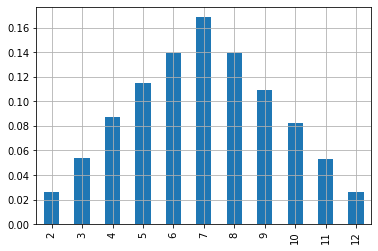

In [30]:
# göreceli frekansın dağılımına baktık.

prob.sort_index().plot(kind='bar', grid=True);

## Binomial Distribution
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

**Exercise 3.40**

The probability that a patient recovers from a stomach disease is 0.8. 

Suppose 20 people are known to have contracted this disease. 

What is the probability that

a. exactly 14 recover?

this is P(X=14)

In [ ]:
# Soruya baktığımızda bunun binominal olduğunu hastalıktan iyileşme ve iyileşmeme gibi iki olasılık olduğunu ve ayrıca trail sayısının verildiğini görüyoruz.
# continuos larda yani sürekli olasılıksal dağılımlarda pdf yöntemi kullanılırken,
# discrete lerin yani kesintili olasılıksal dağılımlarda pml yöntemi kullanılır.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

# linkten girip modüllerden pml ile çözümümüzü yapıyoruz. Buradaki diğer methodlarıda farklı işlemler için kullanabiliriz.

In [33]:
n = 20   # deneme sayısı burada hasta sayısı
p = 0.8  # success olasılığı 
x = 14   # değişken

In [34]:
stats.binom.pmf(x, n, p)

0.10909970097304983

In [35]:
# iyileşmesi beklenen hasta sayısını bulduk.

stats.binom.mean(n,p)

16.0

b. at least 10 recover?

this is P(X≥10)=P(10)+P(11)+P(12)+...+P(20)

In [ ]:
# Yukarıdaki tüm değişkenlerin toplamı 1 dir.

# Burada en az 10 hastanın iyileşme olasığını soruyor.CDF func kullanıyoruz.

In [ ]:
# 1-P(X<=9) olarak da değerlendirebiliriz.

In [40]:
x = 10

In [41]:
1- stats.binom.cdf(x-1, n, p)  # çünkü burada cdf hesabında 10 dahil ediyor. Bunun için 10 çıkarıp 9 üzerinden bulduğumu 1 den çıkarıp 10 ve üzerinin bulmuş olduk.

0.9994365863023398

c. at least 14 but not more than 18 recover?

this is P(14≤X≤18)=P(14)+P(15)+...+P(18)

In [43]:
x1 = 14
x2 = 18

# Böyle iki rakam sorduğundan ya 18 dahil olmak üzere tüm kümülatifleri bulacağız 
# sonra 13 dahil tüm kümülatifleri bulup bunları birbirinden çıkaracağız.


In [45]:
stats.binom.cdf(x2, n, p)  # 18 dahil olanları bulduk.

0.9308247097235891

In [46]:
stats.binom.cdf(x1-1, n, p)   # 14-1 ile 13 dahil olanları bulduk.

0.08669251356740021

In [47]:
stats.binom.cdf(x2, n, p)-stats.binom.cdf(x1-1, n, p)  # 18 e kadar olanlardan 13 e kadar olanları çıkardık yanı 14,15,16,17 ve 18 için olasılıkları bulduk. 

0.844132196156189

In [ ]:
# Yukarıdaki soruyu birde pmf ile çözeceğiz. Sonuç iki yöntemde de aşağı yukarı aynı çıktı.

In [48]:
stats.binom.pmf(14,n,p)+stats.binom.pmf(15,n,p)+stats.binom.pmf(16,n,p)+stats.binom.pmf(17,n,p)+stats.binom.pmf(18,n,p)

0.8441321961561871

d. at most 16 recover?

this is P(X≤16)=1−P(X>16)=P(17)+P(18)+P(19)+P(20)

In [49]:
x = 16  # yani 16 ya kadar olanları topluyoruz. 

In [50]:
stats.binom.cdf(x, n, p)

0.5885511380434305

e. Construct discrete probability distribution table and draw a graph

In [51]:
# tüm hastaların iyileşme olasılıklarını bulduk.

dist = []

for i in range(n+1):
    dist.append(stats.binom.pmf(i,n,p))   # çıkan sonuçları yukarıdaki dist liste attık.
    print(str(i) + "\t" + str(stats.binom.pmf(i,n,p)))   # sonra bunları yazdırdık.

0	1.048576000000001e-14
1	8.388607999999975e-13
2	3.187671040000001e-11
3	7.650410495999974e-10
4	1.3005697843199945e-08
5	1.6647293239295892e-07
6	1.664729323929588e-06
7	1.3317834591436803e-05
8	8.656592484433902e-05
9	0.000461684932503141
10	0.002031413703013826
11	0.007386958920050259
12	0.022160876760150803
13	0.0545498504865252
14	0.10909970097304983
15	0.17455952155687976
16	0.21819940194610007
17	0.2053641430080944
18	0.13690942867206304
19	0.05764607523034236
20	0.011529215046068481


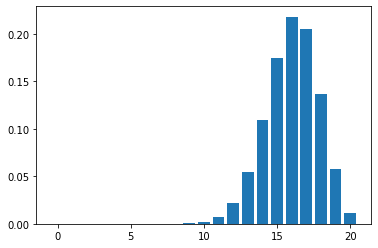

In [52]:
plt.bar(list(range(n+1)), dist)
plt.show()

## Poisson Distribution
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

Suppose that a random system of police patrol is devised so that a patrol officer may visit a given beat location Y = 0, 1, 2, 3, . . . times per half-hour period, with each location being visited an average of once per time period. 

Assume that Y possesses, approximately, a Poisson probability distribution. 

Calculate the probability that the patrol officer will miss a given location during a half-hour period. 

What is the probability that it will be visited once? 

Twice? 

At least once?

https://en.wikipedia.org/wiki/Poisson_distribution

# buradaki grafikte görüldüğü gibi dağılımı ve sonucunu görüyoruz ancak burada bunların hesabını yapacağız.

In [54]:
# Poisson da bir zaman dilimi belirliyorduk. Burada bunu 1 olarak belirledik.

#For this example the time period is a half-hour, and the mean number of visits per half-hour interval is λ = 1. Then

#Python daki lambda ile karıştırmamak için mu kullandık.

mu = 1

P(Y = 0) = ?    Polis devriyesini kaçırma olasılığı

In [55]:
stats.poisson.pmf(0,mu)

0.36787944117144233

P(Y = 1) = ?      Polis devriyesini 1 kere denk gelme olasılığı

In [56]:
stats.poisson.pmf(1,mu)

0.36787944117144233

P(Y = 2) = ?      Polis devriyesini 2 kere denk gelme olasılığı

In [59]:
stats.poisson.pmf(2,mu)

0.18393972058572114

## P(Y ≥ 1) = ?

In [60]:
1- stats.poisson.pmf(0,mu)   # 1-stats.poisson.cdf(0,mu) aynı sonucu verir. cdf 0 demek pmf kendisi demektir.

0.6321205588285577

## P(Y ≥ 3) = ?   Burada 0,1,2 ve 3 toplamını soruyor. Bundan dolayı buda 1-cdf(2) dir.

In [61]:
1-stats.poisson.cdf(2,mu)

0.08030139707139416

## Normal Distribution
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

**Exercise 4.74**

Scores on an examination are assumed to be normally distributed with mean 78 and variance 36.

a. What is the probability that a person taking the examination scores higher than 72?

this is P(X>72)

In [ ]:
mu = 
sigma = 
x = 

b. Suppose that students scoring in the top 10% of this distribution are to receive an A grade.
What is the minimum score a student must achieve to earn an A grade?

In [ ]:
q = 

c. What must be the cutoff point for passing the examination if the examiner wants only the
top 28.1% of all scores to be passing?

In [ ]:
q = 

d. Approximately what proportion of students have scores 5 or more points above the score
that cuts off the lowest 25%?

In [ ]:
q1 = 
x1 = 

*OPTIONAL*

f. If it is known that a student’s score exceeds 72, what is the probability that his or her score
exceeds 84? 

## t Distribution
*Lane, D. (2006). Online statistics education: a multimedia course of study (http://onlinestatbook.com/). Rice University.*

For a t distribution with 15 degrees of freedom, 90% of the distribution is within how many standard deviations of the mean?

In [ ]:
dof = 
q = 